<a href="https://colab.research.google.com/github/danasapir/BME3053C-Spring-2025/blob/main/%5CHWs%5CHomework_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

            X                                               Y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.032890  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50  


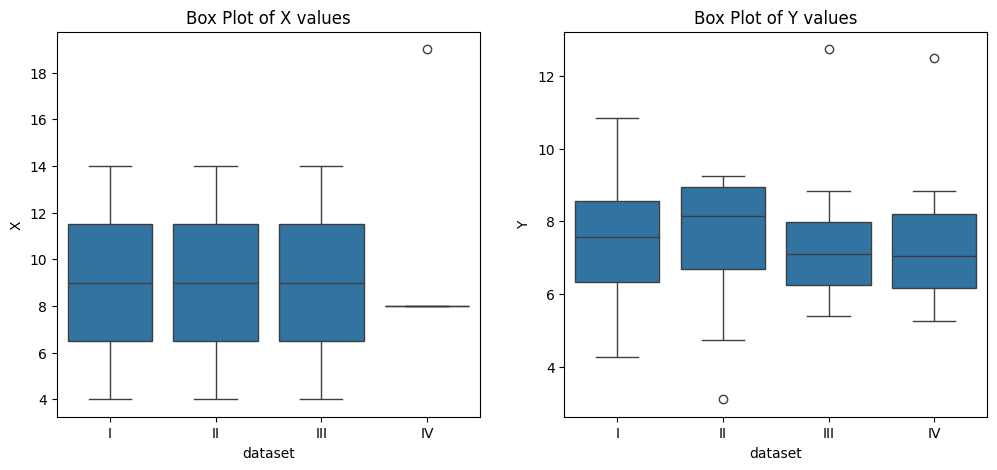

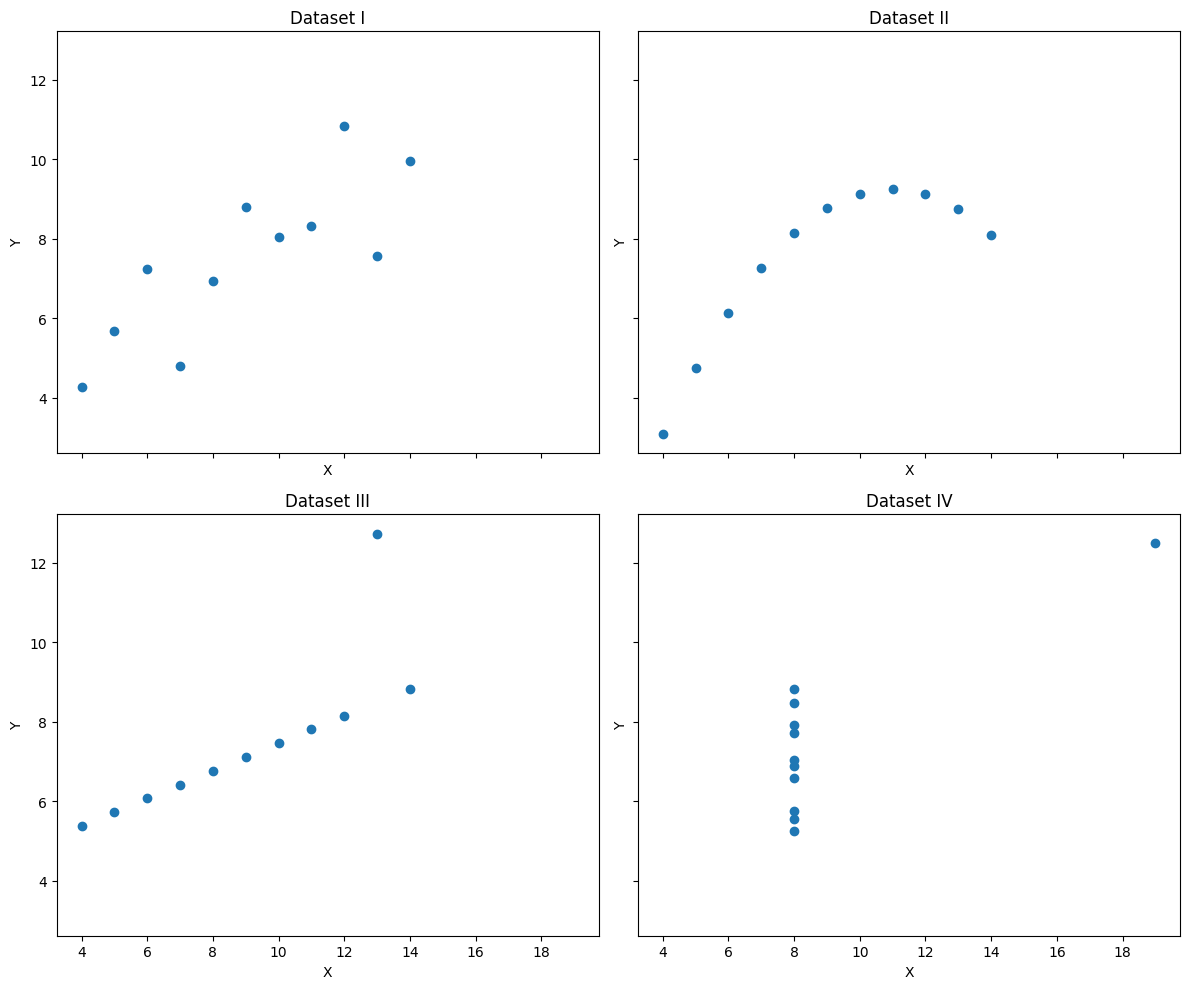

In [12]:
# Homework 4
'''
The Anscombe dataset is a famous demonstration of the importance of visualizing data.
It contains four datasets (labeled I, II, III, and IV).
In this assignment, your goal is to explore the similarities and differences between each dataset.

Tasks:
1) The dataset is saved in the sample_data folder on Colab. Use the code below to import the data into a Colab notebook.
  import pandas as pd
  anscombe_df = pd.read_json('/content/sample_data/anscombe.json')
2) Use grouped_df = your_df.groupby('column_label')Links to an external site. to group the coordinates by dataset and then use pd.describe()
on grouped_df to display some descriptive statistics about each group.Links to an external site.
3) Follow this example and create plot each data Links to an external site.using:
  - a box plotLinks to an external site. The box plot should have two subplots that depict the x and y values for each of the four datasets.
  - a scatter plotLinks to an external site. The scatter plot should have four subplots (one for each dataset) (This linkLinks to an external site.
  contains an example of how you can use groupby and plot Links to an external site.to generate the four scatter plots. Makes sure you set kind to scatter.)
4) In a text cell, write >250 words about the similarities and differences between each dataset and what you learned from the two different plots.
'''

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
anscombe_df = pd.read_json('/content/sample_data/anscombe.json')

# Check if 'Series' column exists and rename it to 'dataset'
if 'Series' in anscombe_df.columns:
    anscombe_df = anscombe_df.rename(columns={'Series': 'dataset'})

# Group by dataset
grouped_df = anscombe_df.groupby('dataset')
print(grouped_df.describe())

# Create box plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Corrected 'x' to 'X' and 'y' to 'Y' for the y-axis variables
sns.boxplot(x='dataset', y='X', data=anscombe_df, ax=axes[0])
axes[0].set_title('Box Plot of X values')
sns.boxplot(x='dataset', y='Y', data=anscombe_df, ax=axes[1])
axes[1].set_title('Box Plot of Y values')
plt.show()

# Create scatter plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
axes = axes.flatten()

for idx, (dataset, data) in enumerate(grouped_df):
    # Access the columns using 'X' and 'Y'
    axes[idx].scatter(data['X'], data['Y'])
    axes[idx].set_title(f'Dataset {dataset}')
    axes[idx].set_xlabel('X')
    axes[idx].set_ylabel('Y')

plt.tight_layout()
plt.show()


The Anscombe dataset demonstrates why visualizing data is crucial. Although all four datasets share nearly identical summary statistics (mean, variance, correlation, and regression lines), their distributions and relationships differ significantly when plotted.

1. Box Plots:
   - The x-values are similarly distributed across all datasets, but the y-values show differences in spread and outliers.
   - Dataset III has a clear outlier in the y-values.

2. Scatter Plots:
   - Dataset I appears to follow a linear relationship.
   - Dataset II shows a non-linear, quadratic-like pattern.
   - Dataset III includes an outlier that significantly affects the regression.
   - Dataset IV has almost all points aligned except for one extreme outlier, which distorts its statistical properties.

This highlights that relying solely on summary statistics can be misleading, and visualizations help detect patterns, trends, and anomalies in data.